# -Ei_300

In [1]:
!pwd

/home/fi0/dev/sandbox/SR-INS/srins/2D Reconstruction


In [2]:
%cd /home/fi0/dev/sandbox/SR-INS/srins/2D Reconstruction

/home/fi0/dev/sandbox/SR-INS/srins/2D Reconstruction


In [3]:
import sys, os
sys.path.append('/home/fi0/dev/sandbox/SR-INS/srins/2D Reconstruction/sparse')

In [4]:
sys.path.append('/home/fi0/anaconda2/lib/python2.7/site-packages')

In [5]:

import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import histogram.hdf as hh, histogram as H
import sparse

plot z in (-0.713188320398, 7.9768476257)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/histogram/data_plotter.py:352: RuntimeWarning: invalid value encountered in less
  negative_median = N.median( z[ z<0 ] )
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/histogram/data_plotter.py:334: RuntimeWarning: invalid value encountered in greater
  positive_median = N.median( z[ z>0 ] )


<IPython.core.display.Javascript object>


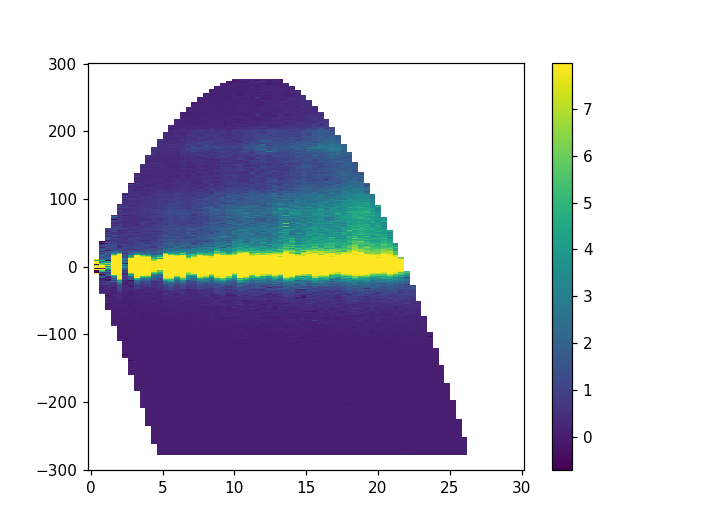

In [6]:
IQE = hh.load('/SNS/users/fi0/dev/graphite-DOS/nonirradiated-DOS/300_spacing1/iqe-interped.h5')
H.plot(IQE[(0, 30), ()])

In [7]:
EtransferI=np.arange(-300, 300, 20.)
QtransferI=np.arange(5, 25, 5.)

In [8]:
outdir='/home/fi0/dev/sandbox/SR-INS/srins/2D_Reconstruction/Ei_300/out'

In [9]:
res=[]

<IPython.core.display.Javascript object>


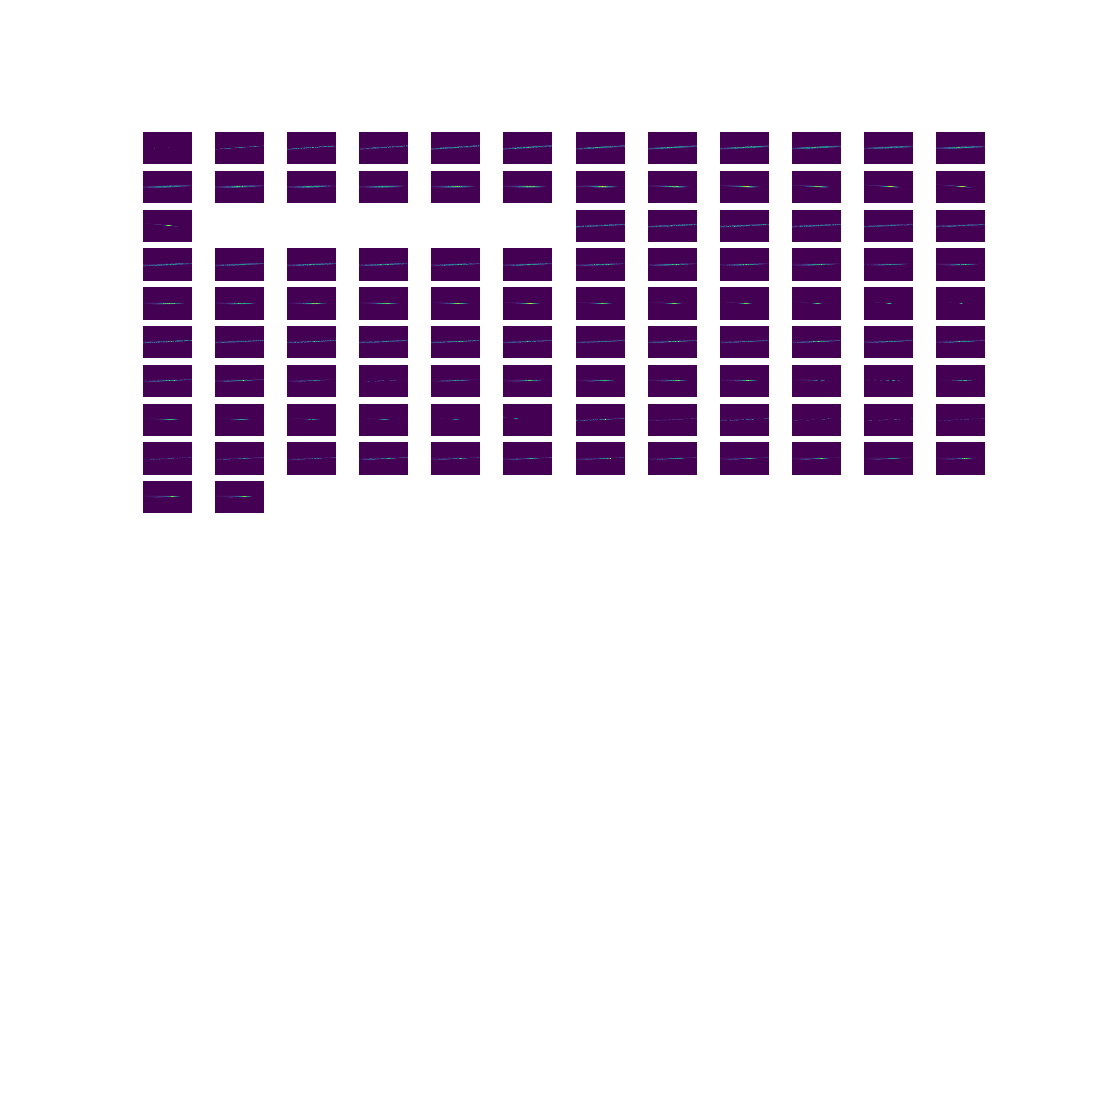

In [11]:
plt.figure(figsize=(10,10))
for j,u in enumerate (QtransferI):
    
    for i, v in enumerate (EtransferI) :
        Etransfer=1.0*v
        Qtransfer=1.0*u
        if not os.path.exists(os.path.join(outdir, 'iqe-Q_{}-E_{}.h5'.format(Qtransfer,Etransfer))):
            continue
        iqe=hh.load(os.path.join(outdir, 'iqe-Q_{}-E_{}.h5'.format(Qtransfer,Etransfer)))
#         print u,v
        iqe.I[iqe.I!=iqe.I] = 0
        I=iqe.I
        res.append(I)
        plt.subplot(len(EtransferI)-8,len(QtransferI)+8, (i+1)+j*len(EtransferI))
        plt.imshow(I)
        plt.axis('off')
plt.show()

In [12]:
res=np.array(res)

In [13]:
from scipy.ndimage.filters import convolve as convolveim
from scipy.signal import convolve as convolvesig

In [14]:
I=IQE.I

In [15]:
dE = IQE.E
dQ = IQE.Q

<IPython.core.display.Javascript object>


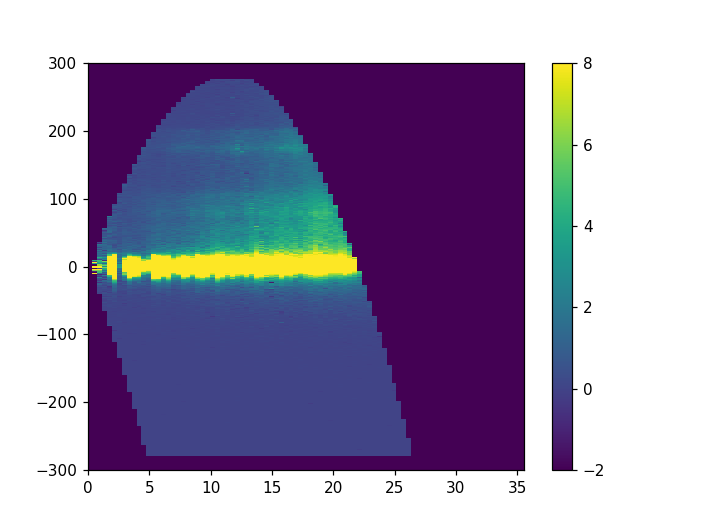

In [16]:
plt.figure()
plt.pcolormesh(dQ,dE,I.T)
plt.colorbar()
plt.clim(-2, 8)
# plt.imshow(I.T)
plt.show()

In [17]:
import linearizedBregman as lb

In [18]:
ini_uZ = np.zeros(I.shape)
ini_vZ = np.zeros(I.shape)

In [19]:
%%time
V,U,error,it,errorBL=lb.bregman_NS(I,res, ini_uZ, ini_vZ, 2,2,'error', 1, maxIter=2)

Iteration #1
Iteration #2
number of iteration: 2
CPU times: user 1min 38s, sys: 1min 4s, total: 2min 42s
Wall time: 2min 42s


<IPython.core.display.Javascript object>


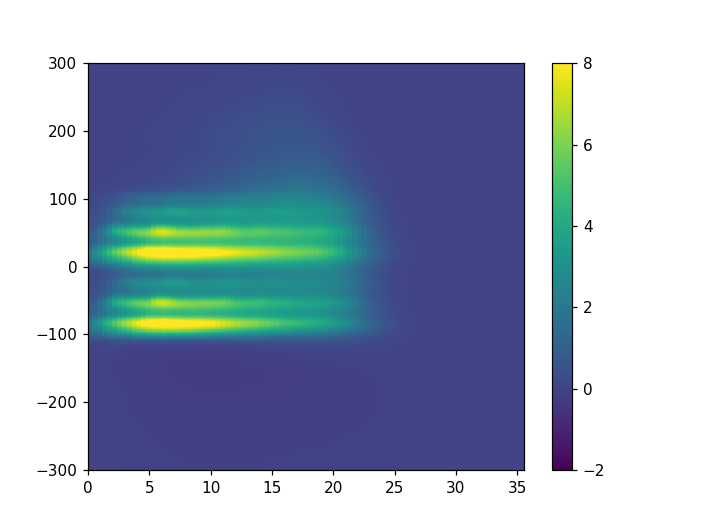

In [21]:
plt.figure()
# plt.imshow(V)
plt.pcolormesh(dQ,dE,V.T)
plt.colorbar()
plt.clim(-2, 8)
plt.show()